# 1. Import Necessary Libraries

In [30]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report

from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings(action = 'ignore')

# 2. Import Data

In [2]:
claimants_data = pd.read_csv("claimants.csv")
claimants_data

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


# 3. Data Understanding

In [3]:
claimants_data.shape

(1340, 7)

In [4]:
claimants_data.dtypes

CASENUM       int64
ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

In [5]:
claimants_data.isna().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [6]:
claimants_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [7]:
claimants_data.describe()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


# 4.Data Preparation

In [9]:
del claimants_data['CASENUM']

In [10]:
claimants_data

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,NaN,0.576
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [12]:
claimants_data.dropna(inplace=True)

In [13]:
claimants_data.shape

(1096, 6)

In [14]:
claimants_data.isna().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

# 5. Model Building

In [16]:
X = claimants_data.drop('ATTORNEY',axis=1)
y = claimants_data[['ATTORNEY']]

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [22]:
X_train.shape,X_test.shape

((876, 5), (220, 5))

In [23]:
y_train.shape,y_test.shape

((876, 1), (220, 1))

# 6.Model Training 

In [29]:
dt_model = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=1234)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1234)

## GridSerachCV

In [28]:
grid_search_cv = GridSearchCV(estimator  = dt_model,
                              param_grid = {'criterion':['gini','entropy'],
                                            'max_depth':[2,3,4,5,6]},
                                    cv   = 5)
grid_search_cv.fit(X,y)
print(grid_search_cv.best_params_)
print(grid_search_cv.best_score_)

{'criterion': 'gini', 'max_depth': 3}
0.7326400996264011


## Plot the tree

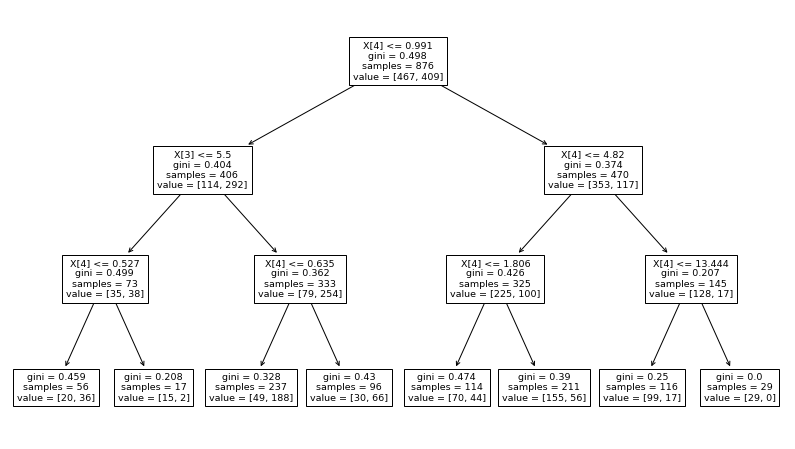

In [33]:
plt.figure(figsize=(14,8))
plot_tree(dt_model)
plt.show()

# 7. Model Testing || 8. Model Evaluation

### Train Data

In [39]:
y_pred_train = dt_model.predict(X_train)

In [42]:
print(confusion_matrix(y_train, y_pred_train))

[[368  99]
 [119 290]]


In [43]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77       467
           1       0.75      0.71      0.73       409

    accuracy                           0.75       876
   macro avg       0.75      0.75      0.75       876
weighted avg       0.75      0.75      0.75       876



In [45]:
accuracy_score(y_train, y_pred_train).round(4)

0.7511

0.7961052967754433


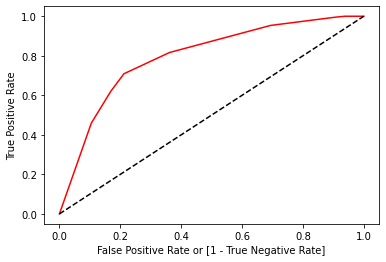

In [46]:
fpr, tpr, thresholds = roc_curve(y_train,dt_model.predict_proba (X_train)[:,1])

auc = roc_auc_score(y_train,dt_model.predict_proba (X_train)[:,1])
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

## Test Data

In [48]:
y_pred_test = dt_model.predict(X_test)

In [49]:
print(confusion_matrix(y_test,y_pred_test))

[[85 26]
 [45 64]]


In [50]:
accuracy_score(y_test,y_pred_test)

0.6772727272727272

In [52]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       111
           1       0.71      0.59      0.64       109

    accuracy                           0.68       220
   macro avg       0.68      0.68      0.67       220
weighted avg       0.68      0.68      0.67       220



# 9. Model Deployement

In [53]:
from pickle import dump

In [54]:
dump(dt_model,open('claimants.itelligence_dt.pkl','wb'))

In [55]:
from pickle import load

In [56]:
loaded_dt_model = load(open('claimants.itelligence_dt.pkl','rb'))

In [57]:
y_pred = loaded_dt_model.predict(X_test)

In [58]:
y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1],
      dtype=int64)

In [59]:
accuracy_score(y_test,y_pred)

0.6772727272727272

# THE END!!!!